In [5]:
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%ls

biggan-play.py           focal_model_2_finetune_2/
classifier/              focal_model_2_finetune_2c.chkpt
ClassifierTest.ipynb     focal_model_2_finetune_2.chkpt
compute_features.py      output_0.png
explore_samples.ipynb    output_1.png
focal_model_2/           output_2.png
focal_model_2.chkpt      tlgan/
focal_model_2_finetune/


In [6]:
f = h5py.File('./tlgan/gan_samples_pineapple.hdf5', 'r')

In [7]:
len(f.keys())

3

In [8]:
print(f['class_vector'][:]) 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [9]:
print(f['latent_vector'][0]) 
print(len(f['latent_vector']))

[ 0.8834262   0.09922487  0.6797343   0.02742095 -0.01293403  0.04157813
 -0.05552012  0.06042197 -0.6718903  -0.44409332  1.2784717   0.3084228
  0.2216483   0.20186155  1.0324291   0.85874236  0.386782    0.33880943
  0.45638365  0.12396644 -0.443374    0.4996591   0.3523581  -0.07923461
 -0.05082483  1.2520977   0.07184126  0.7439025   0.07968613 -0.39481032
 -0.7827771   0.5192854  -0.17498767 -0.52697825 -0.31530195 -0.16409531
  0.9722471   0.30656958  0.5355255   0.13200839 -0.19311176  0.7928931
 -0.797309   -0.17249294 -0.49738157 -0.17405018  0.6783688   0.24017622
  1.3593879  -0.04527205  0.18600653 -0.40957895  0.2778798  -1.1011765
  0.41254535  0.29838866 -1.382317   -0.20099477  0.6477165  -1.3733793
 -0.40699697  0.815163   -0.91489094 -0.277553   -0.32832763 -0.29654345
  1.2336786   0.38524595 -0.13378063  1.3672005  -1.2087388  -0.52075684
 -0.5541055   1.1153535  -0.26302513 -0.44578812  0.08322177 -0.36101055
 -0.9038696   0.7804274  -0.33662477 -0.90644604  0.466

(80000, 512, 512, 3)


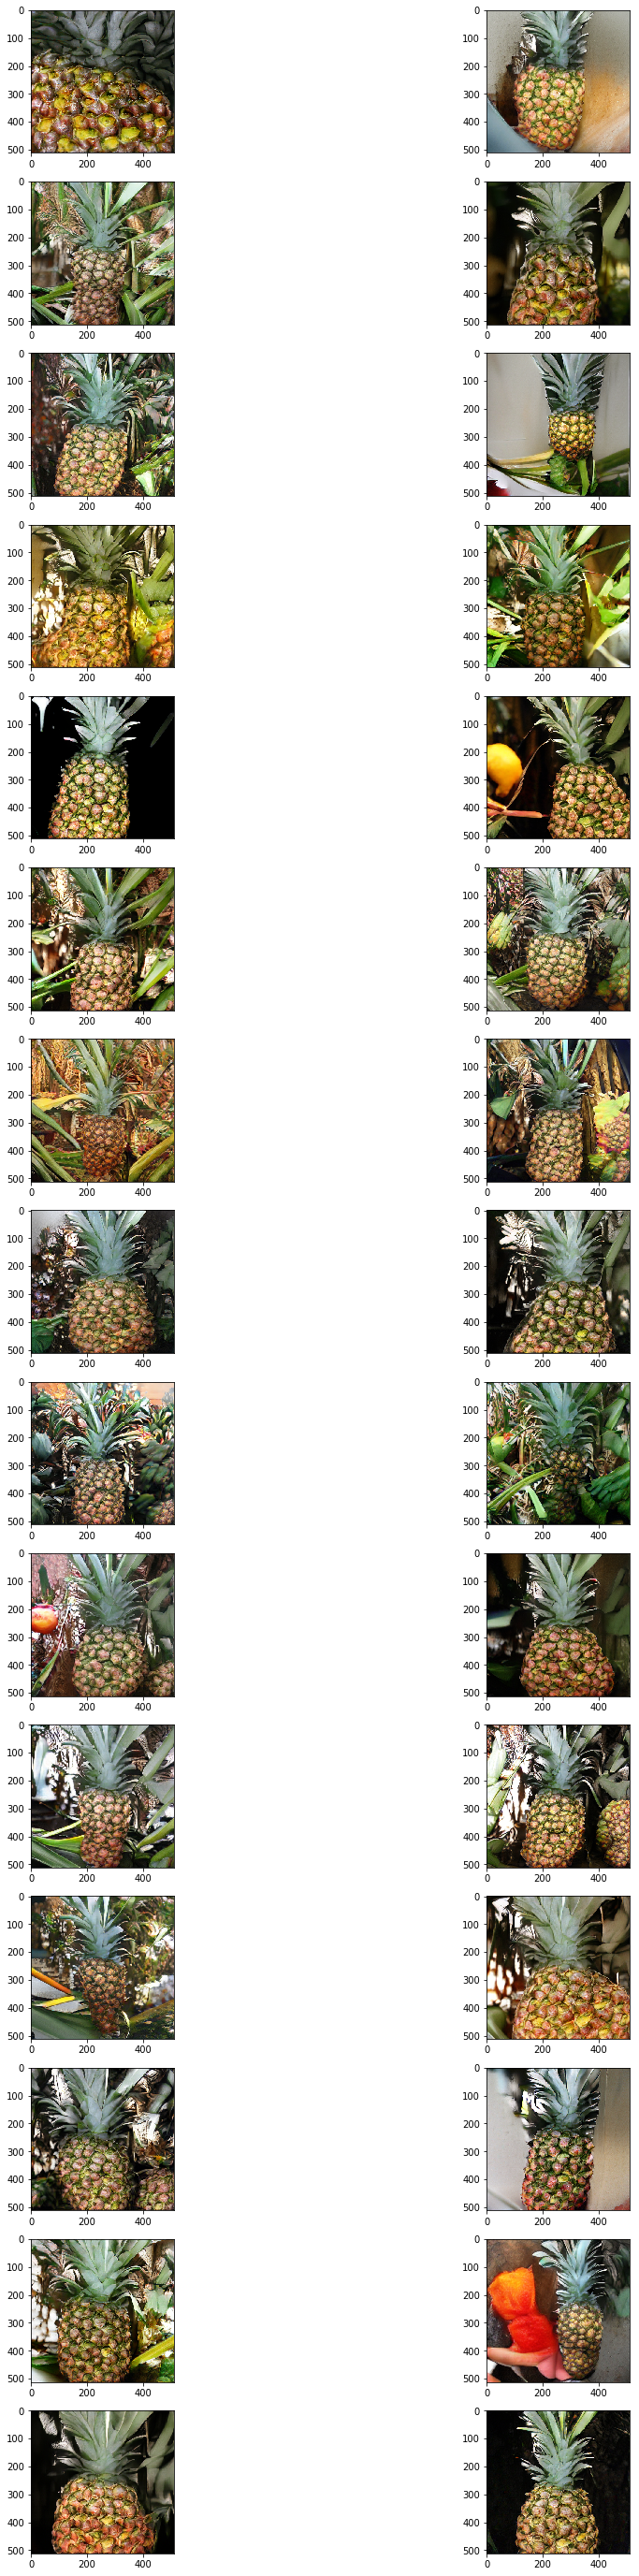

In [10]:
print(f['images'].shape)

images_to_plot = 30
fig = plt.figure(figsize=(16, 50))
cols = 2
rows = images_to_plot/cols

for i, image in enumerate(f['images']):
    if i >= images_to_plot: break
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(image)
plt.show()

In [13]:
f_labels = h5py.File('./tlgan/gan_samples_pineapple_labels.hdf5', 'r')

In [14]:
print(f_labels['labels'].shape)

(80000, 359)


In [15]:
print(f_labels['labels'][5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

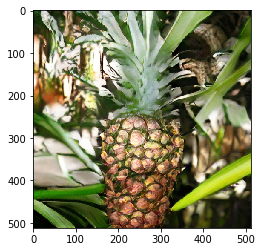

In [16]:
plt.imshow(f['images'][23421])